# Sentiment Analysis

Sentiment analysis using a collection of nearly half a million facebook reviews.

### Import necessary libraries

In [11]:
## Import entire libraries

import pandas as pd
import numpy as np

#library for plotting stuff
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline


## Import specific items only from the sklearn library

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

## Data Preparation

### Get raw data

In [12]:
# Read the data from a file
df0 = pd.read_csv("./data.csv")

In [13]:
# Verify that this data consists of a matrix stored in a Pandas Data Frame
#   containing one row per product and with columns = product attributes.
print(type(df0))
print(df0.shape)
df0.head()

<class 'pandas.core.frame.DataFrame'>
(780, 10)


,Date,Id,Name,Message,Like_Count,Comment_Count,Sentiment_Category,url,Unnamed: 8,Unnamed: 9
0,2018-01-02,2076908612522082,Saida Hajji,bariiii,0.0,0.0,-1,https://www.facebook.com/Baya.Zardii/photos/a....,NaN,NaN
1,2018-01-02,1774334979305301,Břïňï Mĕď,Ya 3saaalllll a7la baya 😍😘😍😘,0.0,0.0,1,https://www.facebook.com/Baya.Zardii/photos/a....,NaN,NaN
2,2018-01-02,4.4617E+14,Hossam Aouadi,الجمال,2.0,0.0,1,https://www.facebook.com/Baya.Zardii/photos/a....,NaN,NaN
3,2018-01-02,3.13873E+14,Sofian Farhat,5ayba,1.0,0.0,-1,https://www.facebook.com/Baya.Zardii/photos/a....,NaN,NaN
4,2018-01-02,7.50575E+14,Taki Eddine Meddeb,لا كلام بية 💓,1.0,0.0,1,https://www.facebook.com/Baya.Zardii/photos/a....,NaN,NaN


In [14]:
#We can also use the info() method to obtain a summary of a pandas Data Frame
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
Date                  776 non-null object
Id                    776 non-null object
Name                  776 non-null object
Message               763 non-null object
Like_Count            776 non-null float64
Comment_Count         778 non-null float64
Sentiment_Category    777 non-null object
url                   780 non-null object
Unnamed: 8            0 non-null float64
Unnamed: 9            1 non-null float64
dtypes: float64(4), object(6)
memory usage: 61.0+ KB


In [31]:
# In order to speed up computation, we'll only use a small random sample
#   of this data comprising 10 % of the rows.
df = df0.sample(frac=0.1, random_state=2137)

print(df.shape)
df.head()

ValueError: a must be greater than 0

### Remove rows that contain missing values

In [32]:
# remove missing values by calling dropna() method
#   arguments:  axis=0, how='any'  <=> remove all rows containing missing value in *any* column
df0.dropna(inplace=True, axis=0, how='any')
print(df0.shape)

(0, 10)


In [33]:
?df.dropna

### Visualize and understand the data matrix

#### Summary of numeric attributes

In [34]:
# The describe() method gives a numeric summary of numeric columns (attributes) only
df.describe()

,Like_Count,Comment_Count,Unnamed: 8,Unnamed: 9
count,77.000000,78.000000,0.0,1.0
mean,0.298701,0.089744,NaN,1.0
std,1.124663,0.400840,NaN,NaN
min,0.000000,0.000000,NaN,1.0
25%,0.000000,0.000000,NaN,1.0
50%,0.000000,0.000000,NaN,1.0
75%,0.000000,0.000000,NaN,1.0
max,9.000000,3.000000,NaN,1.0


#### Distribution of brand names

In [35]:
from collections import Counter
counter = Counter(df0['Sentiment_Category']).most_common()

#number of unique brand names
print(len(counter))

0


In [36]:
# Most frequent brand names in the dataset
counter[0:10]

[]

#### Distribution of product names

In [37]:
counter2 = Counter(df['Like_Count']).most_common()

print(len(counter2))

6


In [38]:
# 5 Most frequent product names in the dataset
counter2[0:5]

[(0.0, 65), (1.0, 9), (9.0, 1), (nan, 1), (3.0, 1)]

#### Distribution of rating values

In [39]:
gR = df0.groupby('Sentiment_Category').size()
print(type(gR))
gR

<class 'pandas.core.series.Series'>


Series([], dtype: int64)

<BarContainer object of 0 artists>

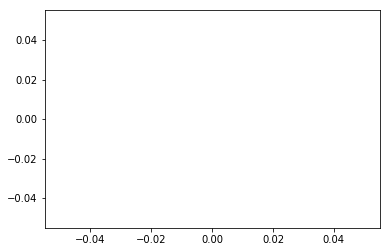

In [40]:
plt.bar(gR.index, gR)

### Create new binary ratings variable

In [41]:
# Remove any 'neutral' ratings equal to 3
df0 = df0[df0['Sentiment_Category'] != 0]

print(df0.shape)

(0, 10)


In [42]:
df0.describe()

,Like_Count,Comment_Count,Unnamed: 8,Unnamed: 9
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [43]:
# Some examples with high ratings
df[df['Sentiment_Category'] == -1].head(5)

,Date,Id,Name,Message,Like_Count,Comment_Count,Sentiment_Category,url,Unnamed: 8,Unnamed: 9


####
- a. Print products that have a "neutral" rating, i.e. a rating of 1
- b. Print products that have a "positive" rating, i.e. rating of 4 or 5
- c. Print products that have a "negative" rating, i.e. rating of 1 or 2
- d. Print number of products of the brand name **Apple**  have a "positive" rating and how many have a "negative" rating   

### Split data into train and test sets

In [44]:
?train_test_split

In [45]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df0['Message'], 
                                                    df0['Sentiment_Category'], 
                                                    random_state=591)

In [46]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.series.Series'>
(0,)


In [47]:
print(type(y_train))
print(y_train.shape)

<class 'pandas.core.series.Series'>
(0,)


In [48]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.series.Series'>
(0,)


In [49]:
X_train.head()

Series([], Name: Message, dtype: object)

In [50]:
y_train.head()

Series([], Name: Sentiment_Category, dtype: object)

In [51]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Sentiment analysis based on BOW model with word occurrences

### Feature extraction

- *Feature extraction* means representing raw text documents as numerical *feature vectors*.
- In the simple BOW model, feature vector = number of word occurrences for each document and each vocabulary word.
- We will do this using the ``CountVectorizer`` class: first we'll **tokenize** the documents and extract the vocabulary set, and then we determine the feature vectors.

#### Tokenize documents & build vocabulary set

In [65]:
vect = CountVectorizer()

# Fit the CountVectorizer to the training data
#  i.e. learn the vocabulary (distinct words) of the input corpus
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [67]:
vect.get_feature_names()

['10',
 '100',
 '100000',
 '16',
 '170',
 '1961',
 '20',
 '2ans',
 '2ara2',
 '30',
 '3adeya',
 '3ahra',
 '3ala',
 '3alekher',
 '3alik',
 '3allé5r',
 '3am',
 '3amalit',
 '3amaliyet',
 '3amalyet',
 '3amla',
 '3amletlo',
 '3amlettou',
 '3amlthoum',
 '3and',
 '3andik',
 '3ar',
 '3asela',
 '3asla',
 '3assla',
 '3assoula',
 '3asssla',
 '3aych',
 '3az3ezti',
 '3bed',
 '3efcha',
 '3fata9',
 '3ifsha',
 '3ijbitni',
 '3in',
 '3inek',
 '3ini',
 '3inik',
 '3iyn',
 '3jbni',
 '3l5r',
 '3la',
 '3lch',
 '3leha',
 '3liha',
 '3liik',
 '3lik',
 '3lina',
 '3llikk',
 '3malt',
 '3morha',
 '3myen',
 '3omreha',
 '3omrek',
 '3omrha',
 '3omrk',
 '3sal',
 '3sayla',
 '3thertk',
 '3zoooooooouza',
 '3zouuuza',
 '3zouza',
 '3zza',
 '40',
 '4alina',
 '4och',
 '56',
 '57',
 '5aiba',
 '5ale9',
 '5arya',
 '5atrk',
 '5ayba',
 '5elti',
 '5fif',
 '5iiiiiiir',
 '5iiitt',
 '5iiîit',
 '5ir',
 '5irlk',
 '5it',
 '5kg',
 '5yout',
 '63',
 '65',
 '7a9',
 '7aja',
 '7ajja',
 '7ala',
 '7asdinek',
 '7atta',
 '7lili',
 '7loua',
 '7lowa'

Print words are there in the vocabulary set

In [68]:
len(vect.get_feature_names())

1445

#### Construct document-term matrix
- This matrix contains the *feature vectors* of a given set of raw documents.
- For the simple BOW model, feature vector = number of word occurrences.

In [69]:
# the document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)
print(type(X_train_vectorized))
print(X_train_vectorized.shape)

# the document-term matrix for the test corpus
X_test_vectorized = vect.transform(X_test)
print(type(X_test_vectorized))
print(X_test_vectorized.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(438, 1445)
<class 'scipy.sparse.csr.csr_matrix'>
(147, 1445)


In [70]:
# Number of non-zero elements in document-term matrix of training corpus
print(X_train_vectorized.nnz)

2119


#### Print the proportion of non-zero elements in ``X_train_vectorized`` document-term matrix

In [71]:
X_train_vectorized.nnz / (X_train_vectorized.shape[0] * X_train_vectorized.shape[1])

0.0033480273656602043

#### Analyze document-term matrix

In [72]:
# Number of training documents that contain each word (called document frequency) fema kelma wawjouda fi document bark w fema kelma mawjouda fi 24 doc
doc_freq = np.array((X_train_vectorized > 0).sum(0))
print(doc_freq.shape)
print(np.amin(doc_freq))
print(np.amax(doc_freq))

(1, 1445)
1
24


In [73]:
# Proportion of training documents that contain each word (called relative document frequency)
n,m = X_train_vectorized.shape
rel_doc_freq = np.array((X_train_vectorized > 0).sum(0)/n)

print(rel_doc_freq.shape)
print(np.amin(rel_doc_freq))
print(np.amax(rel_doc_freq))

(1, 1445)
0.00228310502283
0.0547945205479


In [74]:
# Number of unique words in each training document/ fema doc fih 0 kemla w fema doc fih 38 kemla
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(438, 1)
0
38


In [75]:
len(words_per_doc[words_per_doc ==0])

81

(array([  2.12290000e+04,   1.39000000e+03,   2.69000000e+02,
          8.60000000e+01,   3.50000000e+01,   1.50000000e+01,
          8.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   74.6,  149.2,  223.8,  298.4,  373. ,  447.6,  522.2,
         596.8,  671.4,  746. ]),
 <a list of 10 Patch objects>)

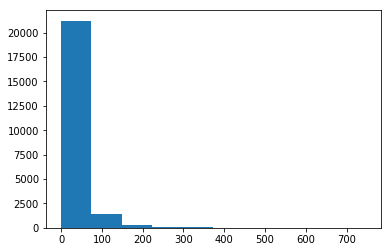

In [164]:
# Plot histogram of number of unique words in each document
plt.hist(words_per_doc)

In [165]:
# Plot histogram of number of document frequency of words
# plt.hist(doc_freq)

#### Remove documents with 0 words from training corpus

In [76]:
# Select documents that contain 0 words
idx = np.where(words_per_doc == 0)[0]
# Show all those documents
X_train.iloc[idx]

411          ❤💖
555    J.t.m ❤❤
356         😌😖😖
642          ❤❤
531          <3
Name: Message, dtype: object

In [77]:
## Remove rows from training data that contain no words
X_train = X_train.drop(X_train.index[idx])
y_train = y_train.drop(y_train.index[idx])
print(X_train.shape)

(433,)


In [78]:
# re-compute the document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.shape

(433, 1445)

In [80]:
# verify results: re-compute number of words in each document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(433, 1)
1
38


### Build classification model using Logistic Regression
We are going to  to build a classification model using the feature vectors of the training documents (which are stored in the variable ``X_train_vectorized``) and their corresponding true sentiment categories (which are stored in the variable ``y_train``).

In [81]:
# Train the model using LR method
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Test the classification model
We'll use the obtained LR model to predict sentiment categories (classes) of test documents.

In [82]:
# Use this model to predict the sentiment category of test documents
LR_predictions = LR_model.predict(X_test_vectorized)
print(type(LR_predictions))
print(LR_predictions.shape)

<class 'numpy.ndarray'>
(147,)


In [83]:
print(LR_predictions[:30])
print(np.array(y_test[:30]))

[ 1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.]
[-1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.]


- For the first 30 test documents, how many predictions are wrong?  *Hint*: see the output of the above cell.
- For the first 1000 test documents, how many predictions are wrong?  *Hint*: use an expression of the form: ``np.sum(a == b)`` where a and b are two arrays of the same size.
- What is the *classification rate* for the entire test corpus?

In [86]:
# Actually, we can also obtain the prediction probabilities for each sentiment category
LR_pred_prob = LR_model.predict_proba(X_test_vectorized)
print(type(LR_pred_prob))
print(LR_pred_prob.shape)

# the prediction probabilities for the first 10 test documents
print(LR_pred_prob[:10,:])

<class 'numpy.ndarray'>
(147, 2)
[[ 0.46485078  0.53514922]
 [ 0.16431827  0.83568173]
 [ 0.18042432  0.81957568]
 [ 0.27803192  0.72196808]
 [ 0.82038889  0.17961111]
 [ 0.71969634  0.28030366]
 [ 0.07019447  0.92980553]
 [ 0.30157635  0.69842365]
 [ 0.21246429  0.78753571]
 [ 0.32725931  0.67274069]]


#### Evaluate performance of classification model

In [87]:
## calculate model's classification rate on the test corpus

LR_classif_rate = accuracy_score(y_test, LR_predictions)
LR_classif_rate

0.78231292517006801

####  Interpretation of model's coefficients (parameters)
Print which vocabulary words are most important in our classification model

In [88]:
# first get LR model's coefficient (there is one coefficient per vocabulary word)
coefs = LR_model.coef_[0]
print(coefs.shape)

# Sort these coefficient values in ascending order
sorted_coef_index = coefs.argsort()  #sort by actual value
sorted_coef_index_2 = abs(coefs).argsort()  #sort by absolute value

(1445,)


In [89]:
# Display the 10 smallest and 10 largest coefficients

#feature_names = vect.get_feature_names()
feature_names = np.array(vect.get_feature_names())

print('Smallest Coefs of LR model:\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

print('Largest Coefs of LR model:\n')
print(' Coefficient values: \n{}'.format(coefs[sorted_coef_index[:-11:-1]]))
print(' Feature names: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

print('Smallest abs(Coefs):\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index_2[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index_2[:10]]))

Smallest Coefs of LR model:

 Coefficient values:
[-1.66356296 -1.62225352 -1.61714436 -1.28702415 -1.10875703 -0.99170879
 -0.90704645 -0.79517843 -0.77632431 -0.75710403]

 Feature names:
['3zouza' '5ayba' 'عزوزة' 'masta' 'maquillage' 'في' 't3awef' 'hhhhhh' 'ya'
 '3ifsha']

Largest Coefs of LR model:

 Coefficient values: 
[ 1.53688888  1.34706152  1.07814788  0.98554512  0.92528683  0.90997876
  0.903053    0.83388748  0.78340395  0.76051351]
 Feature names: 
['belle' 'bayouta' 'ma7lek' 'mahlek' 'محلاك' '3asla' 'thabel' 'dima'
 'ma7leha' '3lik']
Smallest abs(Coefs):

 Coefficient values:
[ 0.00128754  0.0021675  -0.00221346  0.00270874  0.00270874  0.00270874
  0.00270874  0.00270874  0.00270874  0.00270874]

 Feature names:
['العمر' 'benti' 'hhhhhhhhhhhhhhhhh' 'mohamed' 'ljazair' 'salami'
 'boumerdes' 'jidya' 'yahafdhak' 'bay']



### Build classification model using Naive Bayes

In [90]:
## Build Naive Bayes classification model

NB_model = MultinomialNB()
NB_model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
## Use this model to predict sentiment of test documents

NB_predictions = NB_model.predict(X_test_vectorized)

In [92]:
## calculate model's classification rate on the test corpus

NB_classif_rate = accuracy_score(y_test, NB_predictions)
NB_classif_rate

0.78911564625850339

## Sentiment analysis using BOW model and Tfidf
We are basically going to re-do the same steps as above, but using the ``TfidfVectorizer`` class instead of ``CountVectorizer`` class.

In [93]:
## Build vocabulary

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
tfidf_vect = TfidfVectorizer(min_df=5)
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [94]:
# Notice that we obtained a smaller vocabulary than with CountVectorizer model because we used min_df=5

tfidf_feature_names = np.array(tfidf_vect.get_feature_names())
len(tfidf_feature_names)

53

In [95]:
## Build document-term matrices

X_train_vectorized_2 = tfidf_vect.transform(X_train)
X_test_vectorized_2 = tfidf_vect.transform(X_test)

In [96]:
## Build the classification model (classifier)

LR_model_2 = LogisticRegression()
LR_model_2.fit(X_train_vectorized_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
## Evaluate the classifier, i.e. calculate its classification rate

LR_predictions_2 = LR_model_2.predict(X_test_vectorized_2)
accuracy_score(y_test, LR_predictions_2)

0.76870748299319724

In [98]:
## Model interpretation: which vocabulary words are most significant?

#Sort vocabulary words according to their max tfidf feature value over all documents
sorted_tfidf_index = X_train_vectorized_2.max(0).toarray()[0].argsort()

#Sort vocabulary words according to their LR model coefficient value
sorted_coef2_index = LR_model_2.coef_[0].argsort()

In [99]:
print('Vocabulary words sorted by tfidf feature value:')
print('  Smallest:\n{}\n'.format(tfidf_feature_names[sorted_tfidf_index[:10]]))
print('  Largest: \n{}'.format(tfidf_feature_names[sorted_tfidf_index[:-11:-1]]))

Vocabulary words sorted by tfidf feature value:
  Smallest:
['chay' 'm3ak' 'you' 'love' 'sans' 'هذا' 'femme' 'men' 'من' 'كان']

  Largest: 
['يا' 'dima' 'masta' 'maquillage' 'mahlek' 'ma7lek' 'ma7leha' 'la' 'fi'
 'est']


In [100]:
print('Vocabulary words sorted by LR model coefficient value:')
print('  Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('  Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Vocabulary words sorted by LR model coefficient value:
  Smallest Coefs:
['3zouza' '5ayba' 'عزوزة' 'masta' 'maquillage' 'في' 't3awef' 'hhhhhh' 'ya'
 '3ifsha']

  Largest Coefs: 
['belle' 'bayouta' 'ma7lek' 'mahlek' 'محلاك' '3asla' 'thabel' 'dima'
 'ma7leha' '3lik']
